Task - Unemployment Analysis with Pyton

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import datetime as dt
import calendar
%matplotlib inline


In [2]:
df = pd.read_csv('/Users/keshavdadhich/Documents/Task 2/Unemployment_Rate_upto_11_2020.csv')

View the first few rows, column data types, and summary statistics.

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [13]:
df.columns = df.columns.str.strip().str.lower()


In [30]:
df['date'] = pd.to_datetime(df['date'], errors='coerce' , dayfirst=True)


In [16]:
df.region.value_counts()


region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

Adding and Renaming the columns for better understanding

In [17]:
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [18]:
df['region'] = df['region'].astype('category')


In [21]:
df["region"].unique()


['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', ..., 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Length: 27
Categories (27, object): ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', ..., 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [37]:
df.rename(columns={'estimated unemployment rate (%)': 'Unemployment Rate',
    'estimated employed': 'Employed',
    'estimated labour participation rate (%)': 'labour participation rate'} , inplace=True)

In [43]:
df['Unemployment_MA'] = df['Unemployment Rate'].rolling(window=12).mean()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

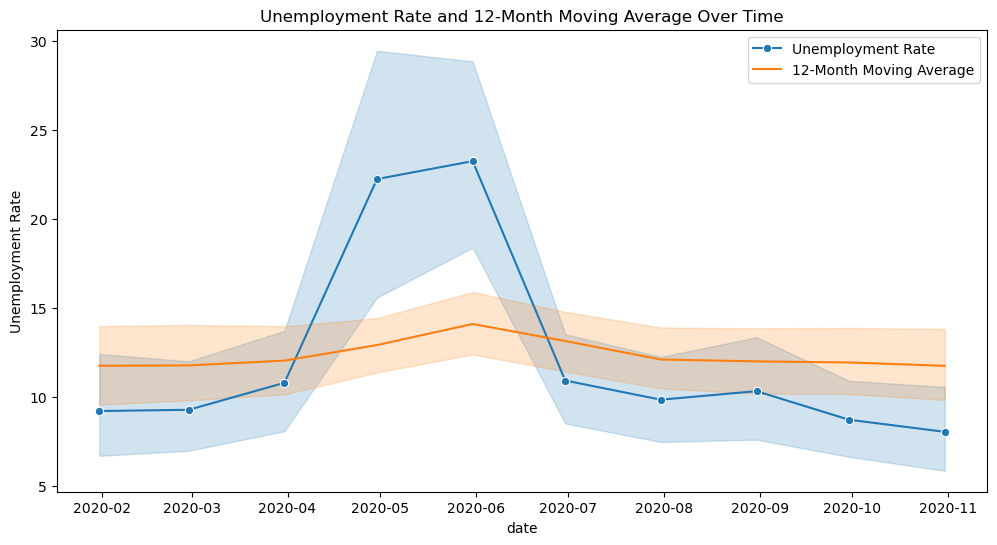

In [44]:
#  plot the unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='Unemployment Rate', marker='o', label='Unemployment Rate')
sns.lineplot(data=df, x='date', y='Unemployment_MA', label='12-Month Moving Average')
plt.title("Unemployment Rate and 12-Month Moving Average Over Time")
plt.legend()
plt.show()

In [47]:
IND =  df.groupby(["month"])[['Unemployment Rate', "Employed", "labour participation rate"]].mean()
IND = pd.DataFrame(IND).reset_index()

month = IND.month
unemployment_rate = IND["Unemployment Rate"]
labour_participation_rate = IND["labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

In [45]:
region_stats = df.groupby(['region'])[['Unemployment Rate','Employed','labour participation rate']].mean().reset_index()
region_stats = round(region_stats,2)
region_stats

,region,Unemployment Rate,Employed,labour participation rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


In [49]:
fig = px.bar(IND, x='month',y='Employed', color='month',
             category_orders = {"month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]}, 
             title='estimated employed people from Jan 2020 to Oct 2020')

fig.show()


In [50]:
fig = px.box(df,x='state',y='Unemployment Rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [52]:
fig = px.bar(df, x='state', y="Unemployment Rate", color="state", title="Average unemploment Rate (State)")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [56]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="state",
                     hover_name="state", size='Unemployment Rate',
                     animation_frame="month",scope='asia',title='Impack of lockdown on employement in India')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65, 100],oceancolor="lightblue",
    showocean=True)

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [59]:
import pandas as pd
import plotly.express as px

# Calculate the total unemployment rate across all regions
total_unemployment = df['Unemployment Rate'].sum()

# Calculate the percentage contribution for each state (relative to the total unemployment)
df['Unemployment Rate (%)'] = (df['Unemployment Rate'] / total_unemployment) * 100

# Prepare data for the Sunburst chart
unemployment = df[["state", "region", "Unemployment Rate (%)"]]

# Create the Sunburst chart
fig = px.sunburst(unemployment, path=['region', 'state'], values='Unemployment Rate (%)',
                  title='Percentage Unemployment Rate by State and Region (Distributed Globally)', height=650)

# Display percentages in the chart
fig.update_traces(texttemplate='%{label}<br>%{value:.2f}%')
fig.show()


/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [60]:
month = IND.month
unemployment_rate = IND["Unemployment Rate"]
labour_participation_rate = IND["labour participation rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name= "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name= "Labour Participation Rate"))

fig.update_layout(title="Uneployment Rate and Labour Participation Rate",
                  xaxis={"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]})

fig.show()

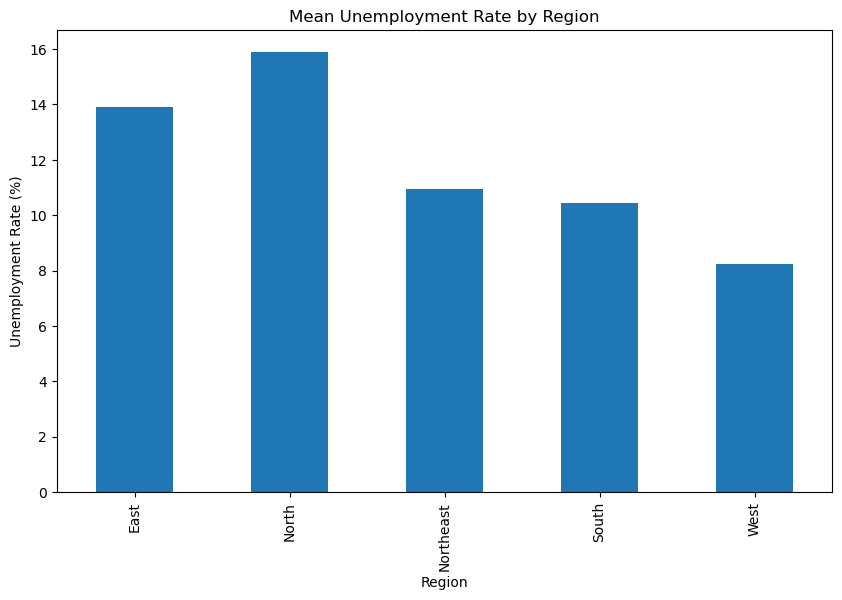

In [65]:
# Group the dataframe by region and calculate the mean unemployment rate for each region
unemployment_by_region = df.groupby('region')['Unemployment Rate'].mean()

# Create a bar chart of the mean unemployment rate for each region
fig, ax = plt.subplots(figsize=(10, 6))
unemployment_by_region.plot(kind='bar', ax=ax)
ax.set(title='Mean Unemployment Rate by Region', xlabel='Region', ylabel='Unemployment Rate (%)')
plt.show()